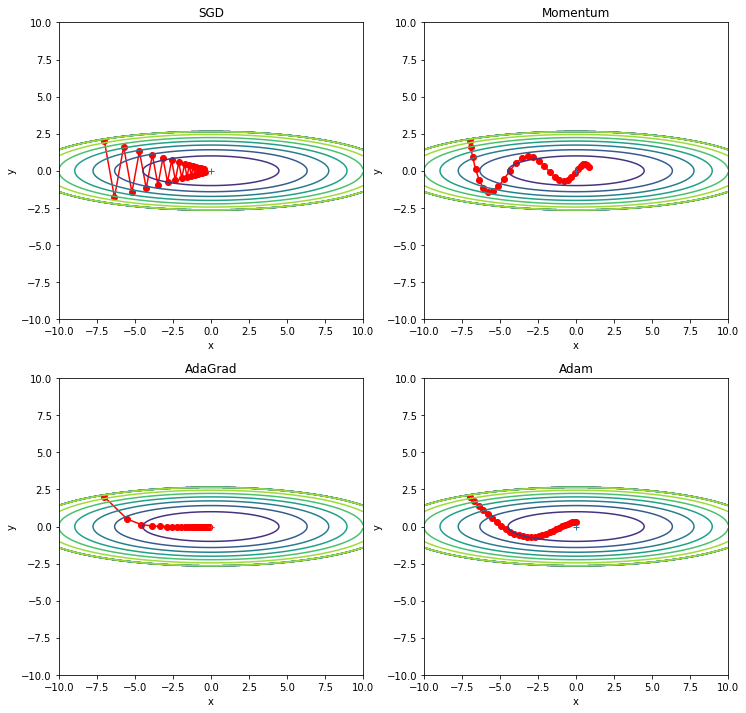

In [8]:
import common.optimizer_compare_naive as op

op.show()

In [10]:

import matplotlib.pyplot as plt
from data.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


In [13]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


In [14]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.333329785416492
Momentum:2.639940395664498
AdaGrad:2.1239650949475766
Adam:2.267088923290422
===========iteration:100===========
SGD:1.3681341315968152
Momentum:0.2583682288249175
AdaGrad:0.09277983065374606
Adam:0.15938129306406823
===========iteration:200===========
SGD:0.6800108686394615
Momentum:0.30346592204919176
AdaGrad:0.15861422820479484
Adam:0.25463723957199635
===========iteration:300===========
SGD:0.4495960924461815
Momentum:0.15440862080853135
AdaGrad:0.043393077767464164
Adam:0.07358344405313483
===========iteration:400===========
SGD:0.372980986938905
Momentum:0.22863862561137555
AdaGrad:0.0922247251473407
Adam:0.1489758648790217
===========iteration:500===========
SGD:0.29848268021171787
Momentum:0.1211960754964373
AdaGrad:0.04610487946606452
Adam:0.09467137517790578
===========iteration:600===========
SGD:0.30763956579954665
Momentum:0.07271245318292438
AdaGrad:0.033966873568983535
Adam:0.0628000070908542
===========iteration:70

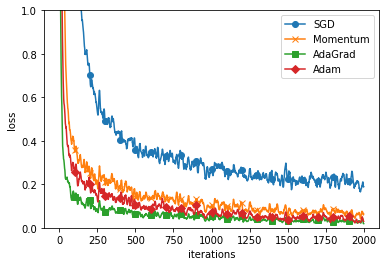

In [15]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

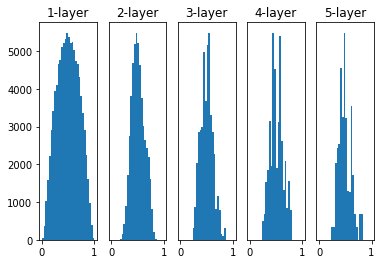

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from common.functions import *


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.
    # LeCun, Xavier
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # He
    # # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)

    # acti
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()